<a href="https://colab.research.google.com/github/AnnaBicelli/Airbnb_Open_Data_project/blob/main/Modeling_Airbnb_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I use Google Colab to do the modeling part because I had serious problems importing the sklearn library in VSCode.<br>I also do the first part of the project here that I've done in the Airbnb_Open_Data_project file so that I've the DataFrame set up correctly.

https://github.com/AnnaBicelli/another-try-.git

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [40]:
pd.set_option('display.max_columns', None)

In [41]:
!unzip Airbnb_Open_Data.zip

Archive:  Airbnb_Open_Data.zip
  inflating: Airbnb_Open_Data.csv    


In [67]:
airbnb_df = pd.read_csv('Airbnb_Open_Data.csv')

<ipython-input-67-0e7af51ed738>:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_df = pd.read_csv('Airbnb_Open_Data.csv')


# First Part

In [68]:
#in the 25th column I have problematic values, so I replace them with NaN
airbnb_df=airbnb_df.replace('#NAME?', np.nan)

In [69]:
# I fix the column indixes
airbnb_df.columns = airbnb_df.columns.map(lambda x: x.lower().replace(' ', '_'))

I remove the dollar sign $ and the commas in the `price` and `service fee` columns and transform them from object to float:

In [70]:
airbnb_df.price = airbnb_df.price.replace({'\$': '', ',': ''}, regex=True).astype(float)

In [71]:
airbnb_df.service_fee = airbnb_df.service_fee.replace({'\$': '', ',': ''}, regex=True).astype(float)

In [72]:
# Convert 'id' and 'host_id' columns from float to object
airbnb_df['id'] = airbnb_df['id'].astype(str)
airbnb_df['host_id'] = airbnb_df['host_id'].astype(str)


In [73]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  object 
 1   name                            102329 non-null  object 
 2   host_id                         102599 non-null  object 
 3   host_identity_verified          102310 non-null  object 
 4   host_name                       102191 non-null  object 
 5   neighbourhood_group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country_code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [74]:
# Null values in columns of float type
null_float_columns = airbnb_df.select_dtypes(include=['float']).isnull().sum()
print("Null values in columns of float type:")
print(null_float_columns)

# Null values in columns of object type
null_text_columns = airbnb_df.select_dtypes(include=['object']).isnull().sum()
print("\nNull values in columns of object type:")
print(null_text_columns)

# Null values in columns of integer type
null_int_columns = airbnb_df.select_dtypes(include=['int']).isnull().sum()
print("\nNull values in columns of integer type:")
print(null_int_columns)

Null values in columns of float type:
lat                                   8
long                                  8
construction_year                   214
price                               247
service_fee                         273
minimum_nights                      409
number_of_reviews                   183
reviews_per_month                 15879
review_rate_number                  326
calculated_host_listings_count      319
availability_365                    448
dtype: int64

Null values in columns of object type:
id                             0
name                         270
host_id                        0
host_identity_verified       289
host_name                    408
neighbourhood_group           29
neighbourhood                 16
country                      532
country_code                 131
instant_bookable             105
cancellation_policy           76
room_type                      0
last_review                15893
house_rules                54843
license

For float variables:
- **replace** the null values related to *float* data with their **mean value** because the percentages are really close to zero.<br>
- **remove** the variable `reviews_per_month`,  from the variable itself. The percentage of null values is excessive and would not lead to useful information for the dataset.<br>
- **drop** the NaN values in the columns `price` and `service_fee`.

In [75]:
lat_mean = airbnb_df['lat'].mean()
airbnb_df['lat'].fillna(lat_mean, inplace=True)

long_mean = airbnb_df['long'].mean()
airbnb_df['long'].fillna(long_mean, inplace=True)

construction_year_mean = airbnb_df['construction_year'].mean()
airbnb_df['construction_year'].fillna(construction_year_mean, inplace=True)

minimum_nights_mean = airbnb_df['minimum_nights'].mean()
airbnb_df['minimum_nights'].fillna(minimum_nights_mean, inplace=True)

number_of_reviews_mean = airbnb_df['number_of_reviews'].mean()
airbnb_df['number_of_reviews'].fillna(number_of_reviews_mean, inplace=True)

review_rate_number_mean = airbnb_df['review_rate_number'].mean()
airbnb_df['review_rate_number'].fillna(review_rate_number_mean, inplace=True)

calculated_host_listings_count_mean = airbnb_df['calculated_host_listings_count'].mean()
airbnb_df['calculated_host_listings_count'].fillna(calculated_host_listings_count_mean, inplace=True)

availability_365_mean = airbnb_df['availability_365'].mean()
airbnb_df['availability_365'].fillna(availability_365_mean, inplace=True)

In [76]:
airbnb_df.dropna(subset=['price'],inplace=True)
airbnb_df.dropna(subset=['service_fee'],inplace=True)

In [77]:
airbnb_df.drop(columns = [ "reviews_per_month"], axis=1, inplace = True)

For object type:
-  **drop** the columns `last_review`,`license` and `house_rules` because the percentage of null values is excessive and would not lead to useful information
<br>The `house_rules` column is the one in which there were problematic values that I replaced with null values, being null more than half of the values of this variable means that I can delete the column.<br>
- **replace** the null values related to *object* variables with the **mode** that is the value that occurs the most in the variable, so it doesn't change the distribution a lot


In [78]:
name_mode = airbnb_df['name'].mode()[0]
airbnb_df['name'].fillna(name_mode, inplace=True)

host_identity_verified_mode = airbnb_df['host_identity_verified'].mode()[0]
airbnb_df['host_identity_verified'].fillna(host_identity_verified_mode, inplace=True)

host_name_mode = airbnb_df['host_name'].mode()[0]
airbnb_df['host_name'].fillna(host_name_mode, inplace=True)

neighbourhood_group_mode = airbnb_df['neighbourhood_group'].mode()[0]
airbnb_df['neighbourhood_group'].fillna(neighbourhood_group_mode, inplace=True)

neighbourhood_mode = airbnb_df['neighbourhood'].mode()[0]
airbnb_df['neighbourhood'].fillna(neighbourhood_mode, inplace=True)

country_mode = airbnb_df['country'].mode()[0]
airbnb_df['country'].fillna(country_mode, inplace=True)

country_code_mode = airbnb_df['country_code'].mode()[0]
airbnb_df['country_code'].fillna(country_code_mode, inplace=True)

instant_bookable_mode = airbnb_df['instant_bookable'].mode()[0]
airbnb_df['instant_bookable'].fillna(instant_bookable_mode, inplace=True)

cancellation_policy_mode = airbnb_df['cancellation_policy'].mode()[0]
airbnb_df['cancellation_policy'].fillna(cancellation_policy_mode, inplace=True)

room_type_mode = airbnb_df['room_type'].mode()[0]
airbnb_df['room_type'].fillna(room_type_mode, inplace=True)

In [79]:
airbnb_df.drop(columns = ["license","house_rules", "last_review"], axis=1, inplace = True)

In [80]:
airbnb_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_identity_verified            0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
country_code                      0
instant_bookable                  0
cancellation_policy               0
room_type                         0
construction_year                 0
price                             0
service_fee                       0
minimum_nights                    0
number_of_reviews                 0
review_rate_number                0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Modeling

import libraries

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

prima di fare il modello devo eliminare tutte le colonne non float che non mi servono per fare previsioni

In [82]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102113 entries, 0 to 102598
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102113 non-null  object 
 1   name                            102113 non-null  object 
 2   host_id                         102113 non-null  object 
 3   host_identity_verified          102113 non-null  object 
 4   host_name                       102113 non-null  object 
 5   neighbourhood_group             102113 non-null  object 
 6   neighbourhood                   102113 non-null  object 
 7   lat                             102113 non-null  float64
 8   long                            102113 non-null  float64
 9   country                         102113 non-null  object 
 10  country_code                    102113 non-null  object 
 11  instant_bookable                102113 non-null  bool   
 12  cancellation_pol

In [83]:
# Selezionare le colonne di tipo 'object' e 'bool' perchè non influenzano il prezzo
colonne_da_eliminare = airbnb_df.select_dtypes(include=['object', 'bool']).columns

# Eliminare le colonne di tipo 'object'
airbnb_df = airbnb_df.drop(columns=colonne_da_eliminare)
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102113 entries, 0 to 102598
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   lat                             102113 non-null  float64
 1   long                            102113 non-null  float64
 2   construction_year               102113 non-null  float64
 3   price                           102113 non-null  float64
 4   service_fee                     102113 non-null  float64
 5   minimum_nights                  102113 non-null  float64
 6   number_of_reviews               102113 non-null  float64
 7   review_rate_number              102113 non-null  float64
 8   calculated_host_listings_count  102113 non-null  float64
 9   availability_365                102113 non-null  float64
dtypes: float64(10)
memory usage: 8.6 MB


e voglio eliminare anche lecolonne id e host_id perchè in realtà sono oggetti VAI NELL ALTRO FILE E FALLE DIVENTARE OGGETTI

In [84]:
airbnb_df.head()

,lat,long,construction_year,price,service_fee,minimum_nights,number_of_reviews,review_rate_number,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,2020.0,966.0,193.0,10.0,9.0,4.0,6.0,286.0
1,40.75362,-73.98377,2007.0,142.0,28.0,30.0,45.0,4.0,2.0,228.0
2,40.80902,-73.94190,2005.0,620.0,124.0,3.0,0.0,5.0,1.0,352.0
3,40.68514,-73.95976,2005.0,368.0,74.0,30.0,270.0,4.0,1.0,322.0
4,40.79851,-73.94399,2009.0,204.0,41.0,10.0,9.0,3.0,1.0,289.0


ora provo tenendo la colonna id anche se in realtà non sono numeri, in caso dopo faccio airbnb_df.drop('id', axis=1)

I want to predict the daily price for the Airbnbs in New York City and I want use the linear regression.
To begin, I define the target variable.

Split dataset to X and Y variables

In [85]:
# I want to predict the daily price of the Airbnb in New York City
Y = airbnb_df.price
Y

0          966.0
1          142.0
2          620.0
3          368.0
4          204.0
           ...  
102594     844.0
102595     837.0
102596     988.0
102597     546.0
102598    1032.0
Name: price, Length: 102113, dtype: float64

In [86]:
X = airbnb_df.drop(['price'], axis = 1) #per fare la previsioen elimino la colonna che devo prevedere
X

,lat,long,construction_year,service_fee,minimum_nights,number_of_reviews,review_rate_number,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,2020.0,193.0,10.0,9.0,4.0,6.0,286.0
1,40.75362,-73.98377,2007.0,28.0,30.0,45.0,4.0,2.0,228.0
2,40.80902,-73.94190,2005.0,124.0,3.0,0.0,5.0,1.0,352.0
3,40.68514,-73.95976,2005.0,74.0,30.0,270.0,4.0,1.0,322.0
4,40.79851,-73.94399,2009.0,41.0,10.0,9.0,3.0,1.0,289.0
...,...,...,...,...,...,...,...,...,...
102594,40.70862,-73.94651,2003.0,169.0,1.0,0.0,3.0,1.0,227.0
102595,40.80460,-73.96545,2016.0,167.0,1.0,1.0,2.0,2.0,395.0
102596,40.67505,-73.98045,2009.0,198.0,3.0,0.0,5.0,1.0,342.0
102597,40.74989,-73.93777,2015.0,109.0,2.0,5.0,3.0,1.0,386.0


Data split

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 101) #80% of X and Y are test and 20% are train

In [105]:
# 80% of X and Y
X_train.shape , Y_train.shape

((81690, 9), (81690,))

In [106]:
# 20% of X and Y
X_test.shape , Y_test.shape

((20423, 9), (20423,))

Linear Regression Model

In [107]:
# define the Regression model
model = LinearRegression()

In [108]:
# build the training model
model.fit(X_train, Y_train)

LinearRegression()

In [109]:
# apply the trained model to make prediction on test set
Y_pred = model.predict(X_test)

Prediction results: Model performances

In [110]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'% mean_squared_error(Y_test, Y_pred))
print('Coefficient of determiantion (R^2) :%.2f' % r2_score(Y_test, Y_pred))

Coefficients: [-1.85864360e-01  1.19193933e-02 -1.78832688e-03  4.99972923e+00
 -7.67014393e-05  1.95836897e-04 -3.71652642e-04  1.24224694e-04
 -2.72064284e-05]
Intercept: 12.078969530151312
Mean squared error (MSE): 2.01
Coefficient of determiantion (R^2) :1.00


so the equation of the model is:<br>
price = -8.385 * (id) + 1.907 * (host_id) - 1.57856 * (lat) + 1.129 *(long) - 9.321 * (construction_year) + 4.999 * (service_fee) - 1.4187 * (minimum_nights) + 1.3003 * (number_of_reviews) + 1.8624 * (review_rate_number) - 2.022 * (calculated_host_listings_count) - 2.5296 * (availability_365)

Scatter plot

In [111]:
Y_test

3643       181.0
52111      756.0
8990       979.0
99393      904.0
36571     1005.0
           ...  
80022      229.0
85395      485.0
71158      143.0
32136      928.0
101971     929.0
Name: price, Length: 20423, dtype: float64

In [112]:
Y_pred

array([179.99601731, 754.97570898, 979.96198172, ..., 145.02530025,
       929.94279467, 929.96435301])

<Axes: xlabel='price'>

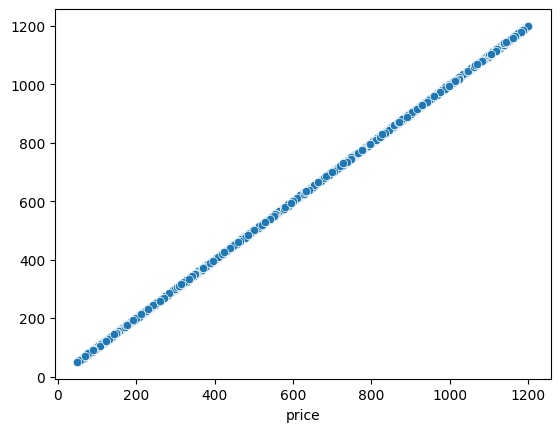

In [113]:
sns.scatterplot(x=Y_test, y=Y_pred)

siccome price è correlata solamente con service_fee il modello di regressione lineare produce questo risultato in cui i plot nello scatterplot seguono una linea reatta diagonale ascendente

In [114]:
intercept = model.intercept_
coefficients = model.coef_
print("Equazione della linea di regressione:")
print("Y = {:.2f} + {:.2f} * X".format(intercept, coefficients[0]))


Equazione della linea di regressione:
Y = 12.08 + -0.19 * X


<Axes: xlabel='price', ylabel='Count'>

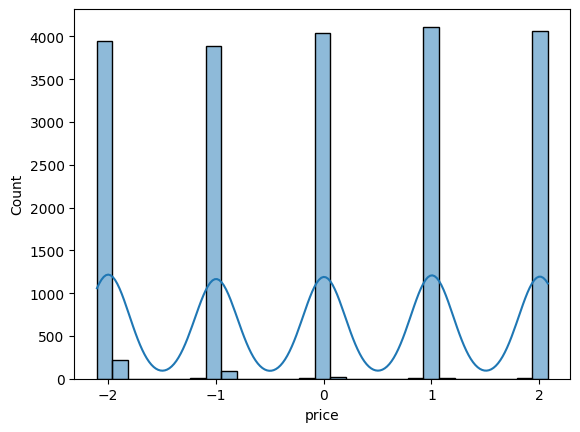

In [115]:
# Plot della distribuzione dei residui
# Calcola i residui
residui = Y_test - Y_pred
sns.histplot(residui, kde=True)


ORa fai classification come ha fatto il profe e poi calcola accuracy--> classification si fa su varibaili categoriche e quidni cerca di capire su quale variabile farla

probabilmente andava fatta prima di regression perche ho eliminato dal dataframe tutte le colonne rigaurdanti object e bool quindi dovrei farla prima